# Visualization with Python ecosystem

In [31]:
from arcgis.gis import *
gis = GIS()

In [32]:
county_search = gis.content.search("title:USA counties & owner:esri_dm", "feature layer")
county_search

[<Item title:"USA Counties (Generalized)" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"USA Counties" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"USA Counties (Generalized)" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"USA Counties" type:Feature Layer Collection owner:esri_dm>]

In [33]:
county_item = county_search[0]
county_item.layers

[<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Counties_Generalized/FeatureServer/0">]

In [34]:
county_item

<Item title:"USA Counties (Generalized)" type:Feature Layer Collection owner:esri_dm>

In [35]:
county_feature_layer = county_item.layers[0]
for field in county_feature_layer.properties.fields:
    print(field['name'] + " \t: " + field['type'])

FID 	: esriFieldTypeOID
NAME 	: esriFieldTypeString
STATE_NAME 	: esriFieldTypeString
POP2010 	: esriFieldTypeInteger
POP10_SQMI 	: esriFieldTypeDouble
POP2012 	: esriFieldTypeInteger
POP12_SQMI 	: esriFieldTypeDouble
WHITE 	: esriFieldTypeInteger
BLACK 	: esriFieldTypeInteger
AMERI_ES 	: esriFieldTypeInteger
ASIAN 	: esriFieldTypeInteger
HAWN_PI 	: esriFieldTypeInteger
HISPANIC 	: esriFieldTypeInteger
OTHER 	: esriFieldTypeInteger
MULT_RACE 	: esriFieldTypeInteger
MALES 	: esriFieldTypeInteger
FEMALES 	: esriFieldTypeInteger
AGE_UNDER5 	: esriFieldTypeInteger
AGE_5_9 	: esriFieldTypeInteger
AGE_10_14 	: esriFieldTypeInteger
AGE_15_19 	: esriFieldTypeInteger
AGE_20_24 	: esriFieldTypeInteger
AGE_25_34 	: esriFieldTypeInteger
AGE_35_44 	: esriFieldTypeInteger
AGE_45_54 	: esriFieldTypeInteger
AGE_55_64 	: esriFieldTypeInteger
AGE_65_74 	: esriFieldTypeInteger
AGE_75_84 	: esriFieldTypeInteger
AGE_85_UP 	: esriFieldTypeInteger
MED_AGE 	: esriFieldTypeDouble
MED_AGE_M 	: esriFieldTypeDoub

### Plot California plopulation by county

In [36]:
county_fset = county_feature_layer.query("STATE_NAME='California'")
county_df = county_fset.df
county_df.head(5)

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,POP10_SQMI,POP12_SQMI,POP2010,POP2012,RENTER_OCC,SQMI,STATE_NAME,VACANT,WHITE,SHAPE
0,1718,1870,1799,4081,3832,4450,3717,1567,2153,1263,...,28.2,28.298164,28610,28685,3793,1013.67,California,1279,21098,"{'rings': [[[-13764448.6974112, 5067709.872833..."
1,602,604,422,904,1062,1444,1634,564,1108,570,...,2.3,2.329272,9686,9791,1278,4203.46,California,1128,8084,"{'rings': [[[-13505958.3490088, 5038775.257409..."
2,2726,2757,2178,4277,4536,6910,7851,2410,4941,2689,...,7.1,7.120891,44900,45200,6876,6347.52,California,4405,38030,"{'rings': [[[-13519166.2685717, 5039046.455062..."
3,744,789,544,1271,1388,2326,2697,640,1674,837,...,4.3,4.384289,13786,14063,1799,3207.59,California,2598,12033,"{'rings': [[[-13684839.3710457, 4862925.094590..."
4,11394,12439,11003,19957,19567,26585,25506,10537,16551,9446,...,46.1,46.480517,177223,178831,25069,3847.44,California,6967,153726,"{'rings': [[[-13505532.782288, 4931260.7901371..."


In [ ]:
county_df.shape

#### Use the 'Name' column as index
makes plotting easier

In [37]:
county_df.NAME.head(10)

0    Del Norte
1        Modoc
2     Siskiyou
3      Trinity
4       Shasta
5       Lassen
6     Humboldt
7       Tehama
8       Plumas
9        Butte
Name: NAME, dtype: object

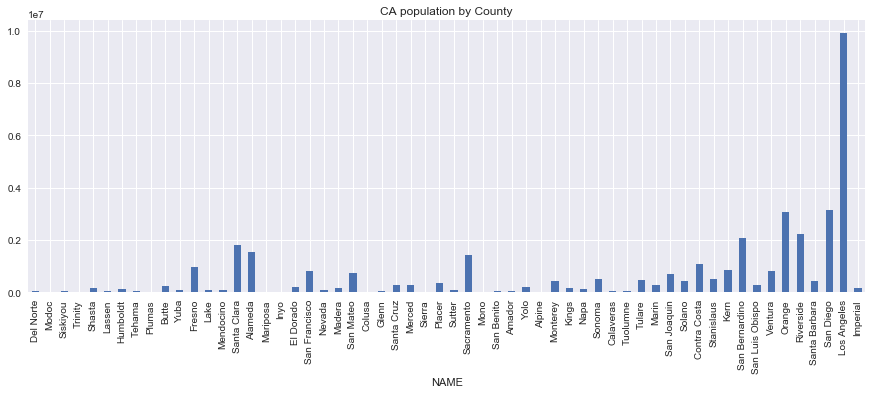

In [38]:
import matplotlib.pyplot
%matplotlib inline
county_df.set_index('NAME', inplace=True)

county_df.POP2012.plot(kind='bar', x='NAME', figsize=(15,5), 
                       title='CA population by County')

### More plotting - how are the columns correlated

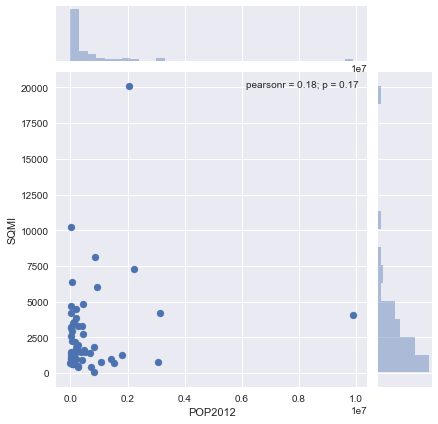

In [39]:
import seaborn as sns
sns.jointplot(county_df['POP2012'], county_df['SQMI'])

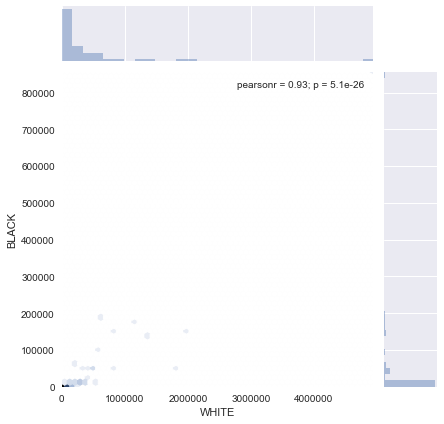

In [41]:
sns.jointplot(county_df['WHITE'], county_df['BLACK'], kind='hex')

Influence of population density on vacancy

In [ ]:
county_df['pop_density'] = county_df['POP12_SQMI'] / county_df['SQMI']
county_df['pop_density'].head()

Histogram of population density

In [ ]:
sns.jointplot('pop_density', 'VACANT', data=county_df)

### Correlation amongst all variables

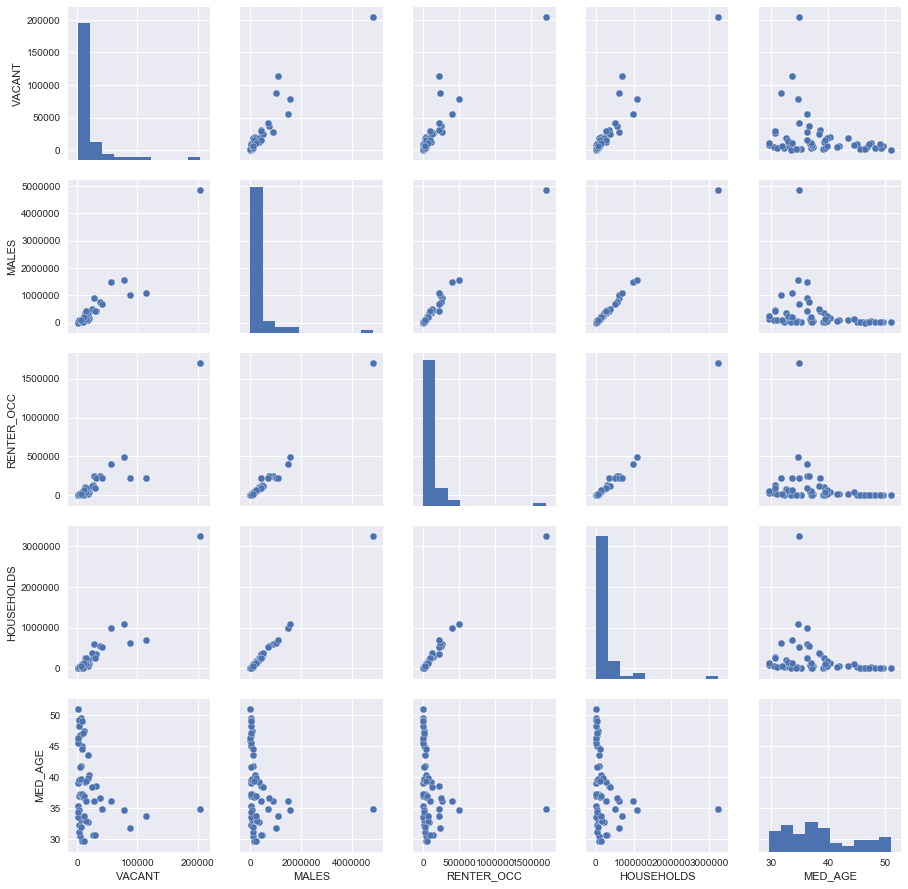

In [42]:
sns.pairplot(county_df[['VACANT','MALES','RENTER_OCC','HOUSEHOLDS', 'MED_AGE']])